In [88]:
library(ggplot2)
library(reshape2)
library(repr)

options(repr.plot.width=4, repr.plot.height=3)

In [74]:
xs <- read.csv('benchmark.csv')
str(xs)

'data.frame':	7216 obs. of  10 variables:
 $ program       : Factor w/ 1 level "palindrome": 1 1 1 1 1 1 1 1 1 1 ...
 $ inference     : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ specialisation: Factor w/ 1 level "False": 1 1 1 1 1 1 1 1 1 1 ...
 $ verification  : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ normalisation : Factor w/ 2 levels "False","True": 2 2 2 2 2 2 2 2 2 2 ...
 $ compilation   : Factor w/ 3 levels "","False","True": 1 1 1 1 3 3 3 3 3 3 ...
 $ input_size    : int  NA NA NA NA NA NA NA NA 1 1 ...
 $ sample_no     : int  0 1 2 3 0 1 2 3 0 1 ...
 $ stage         : Factor w/ 3 levels "csc","execution",..: 3 3 3 3 1 1 1 1 2 2 ...
 $ runtime       : num  0.122 0.121 0.121 0.121 1.71 ...


In [75]:
bools <- c('inference', 'specialisation', 'verification', 'normalisation', 'compilation')
nas <- xs[,bools] == ""
xs[,bools] <- xs[,bools] == "True"
xs[,bools][nas] <- NA

In [120]:
tr <- xs

block <- xs[,bools]
block[is.na(block)] <- F

tr$config <- paste(as.character(tr$stage), "-", sep="")
for (col in bools) {
    tr$config[block[,col]] <- paste(tr$config[block[,col]], substr(col, 1, 1), sep="")
}
tr$config <- factor(tr$config)

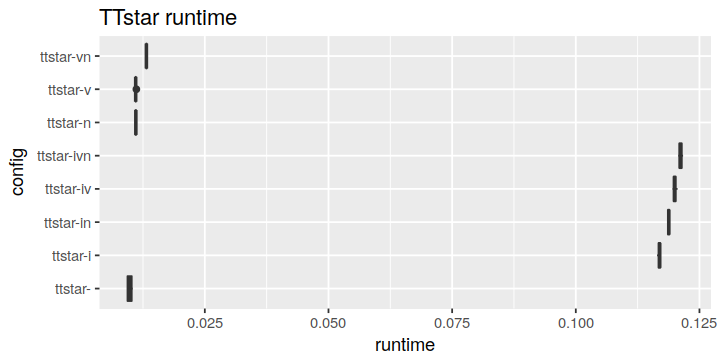

In [121]:
# ttstar
ttstar <- tr[tr$stage == "ttstar",]

options(repr.plot.width=6, repr.plot.height=3)
ggplot(ttstar, aes(x=config, y=runtime)) +
    geom_boxplot() +
    coord_flip() +
    ggtitle("TTstar runtime")

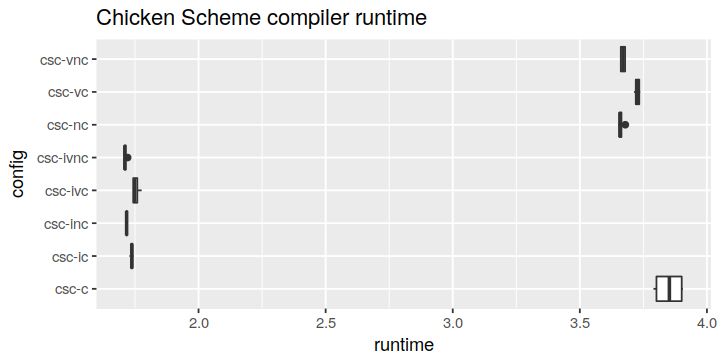

In [122]:
# ttstar
csc <- tr[tr$stage == "csc",]

options(repr.plot.width=6, repr.plot.height=3)
ggplot(csc, aes(x=config, y=runtime)) +
    geom_boxplot() +
    coord_flip() +
    ggtitle("Chicken Scheme compiler runtime")

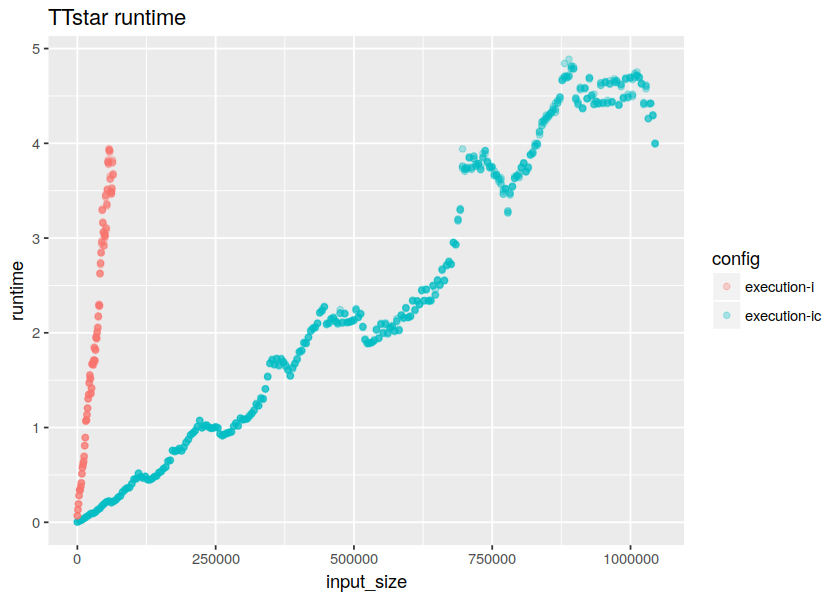

In [132]:
# ttstar
exec <- tr[tr$stage == "execution" & !tr$normalisation & !tr$verification,]

options(repr.plot.width=7, repr.plot.height=5)
ggplot(exec[exec$inference,], aes(x=input_size, y=runtime, color=config)) +
    geom_point(alpha=0.3) +
    ggtitle("TTstar runtime")

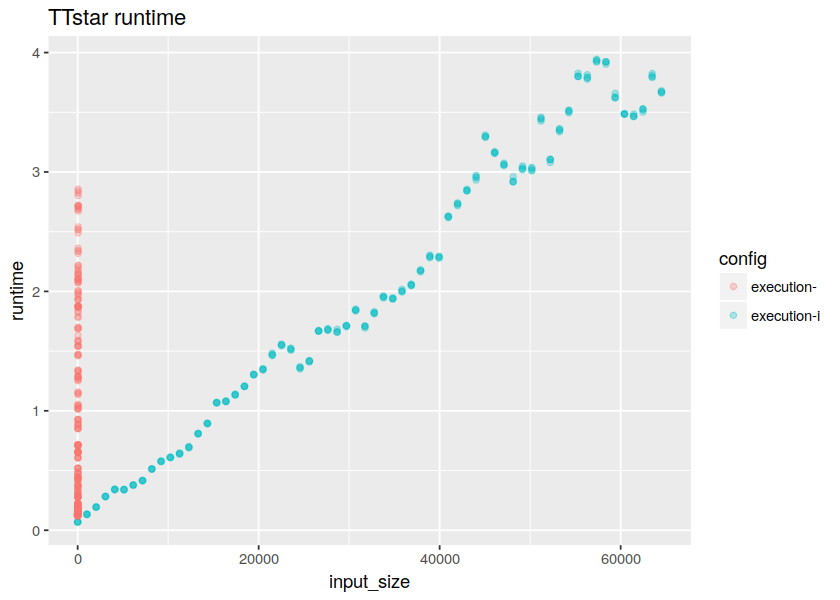

In [139]:
ggplot(exec[!exec$compilation,], aes(x=input_size, y=runtime, color=config)) +
    geom_point(alpha=0.3) +
    ggtitle("TTstar runtime")

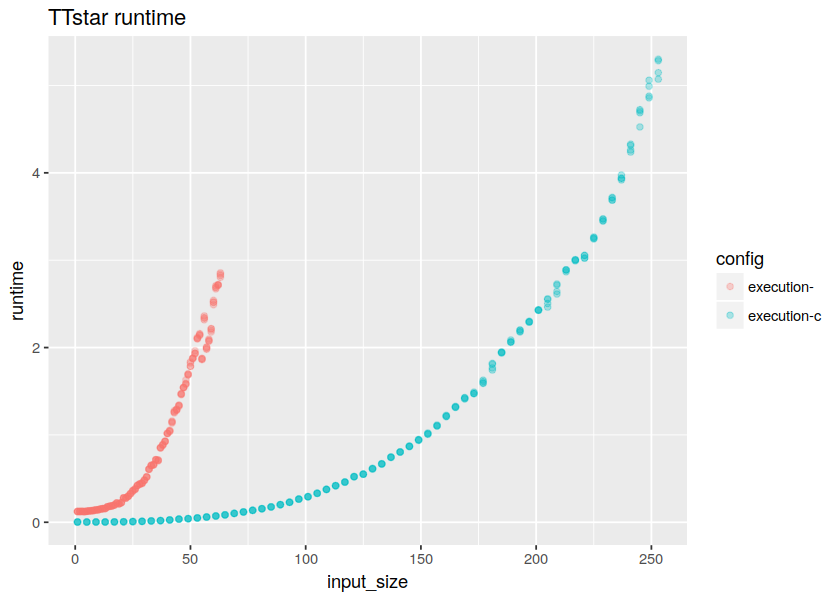

In [135]:
ggplot(exec[!exec$inference,], aes(x=input_size, y=runtime, color=config)) +
    geom_point(alpha=0.3) +
    ggtitle("TTstar runtime")